centerLab 34.770530686349 -2.962306929907843 -11.619917516510936 black
centerLab 14.801146715213292 -2.6181165566881437 -9.899892921482634 black
centerLab 2.6359500475329867 0.4423982011463323 -7.634889484344814 black
centerLab 58.86541676338071 0.517589679879471 -9.441410982638843 white
centerLab 28.579810741449073 -2.263342853921296 -8.307488114327576 black


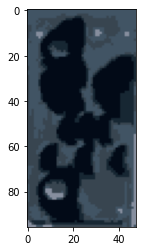

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import skimage.color


color_limit = 12
brightness_limit = 50
def get_lab_color_class(L,a,b):
    if np.abs(a) < color_limit and np.abs(b) < color_limit:
        if L < brightness_limit:
            return "black"
        return "white"

    if np.abs(b) > np.abs(a):
        if b <= -color_limit: 
            return "blue"
        if b >=  color_limit: 
            return "yellow"
    else:
        if a <= -color_limit: 
            return "green"
        if a >=  color_limit: 
            return "red"

    raise Exception("cannot classify color")


    
    

COLORS = {}
COLORS["red"] = (255,0,0)
COLORS["yellow"] = (255,255,0)
COLORS["white"] = (255,255,255)
COLORS["green"] = (0,255,0)
COLORS["black"] = (0,0,0)
COLORS["blue"] = (0,0,255)

COLORS["label_0"] = ( 0 , 0 , 0 )
COLORS["label_1"] = ( 255 , 0 , 0 )
COLORS["label_2"] = ( 0 , 255 , 0 )
COLORS["label_3"] = ( 0 , 0 , 255 )
COLORS["label_4"] = ( 255 , 255 , 0 )


# read the image
image = cv2.imread("../data/histogram_test.png")

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# show the original image
plt.imshow(image)
plt.show()

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

                             
# convert to float
pixel_values = np.float32(pixel_values)


# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 5

#Alternative
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)








 
label_color_class = dict()
# convert back to 8 bit values
centers = np.uint8(centers)
for ix in range(len(centers)):
    r , g, b = centers[ix]
    L , a , b = skimage.color.rgb2lab((r,g,b))
    color_class = get_lab_color_class(L,a,b)
    label_color_class[ix] = color_class
    print("centerLab",L , a , b,color_class)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()

# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable

for cl in range(k):
    #masked_image[labels == cl] = COLORS[label_color_class[cl]]
    masked_image[labels == cl] = COLORS["label_{}".format(cl)]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()